# GAGE II Modeling - EDA

-------------------
### Author: Yunsu Park
### Date: 2025-01-25
---------------------

This notebook explores the GAGE II dataset

## Helper Functions

In [16]:
import os
import pandas as pd

def get_file_names(folder_path: str) -> list:
    """
    Get all file names in a folder
    """
    return os.listdir(folder_path)

def get_data_coverage(file_name: str, col_name: str = "discharge") -> float:
    """
    Get the discharge coverage from the file name
    """
    
    data: pd.DataFrame = pd.read_csv(file_name)
    
    num_rows: int = data.shape[0]
    
    if num_rows == 0:
        return 0
    
    if col_name == "discharge":
        data[col_name] = data[col_name].apply(lambda x: x if x >= 0 else None)
    
    num_missing_discharge: int = data[col_name].isnull().sum()
    
    return 1 - num_missing_discharge / num_rows

def get_column_values(file_name: str, col_name = "discharge") -> pd.Series:
    """
    Get the discharge values from the file name
    """
    
    data: pd.DataFrame = pd.read_csv(file_name)
    data = data.dropna(subset=[col_name])
    
    
    return data[col_name]

def basin_id_to_key(basins_file: list) -> dict:
    """
    Convert the basin id to a key
    """
    
    key: dict = {}
    
    for i, basin_id in enumerate(basins_file):
        if basin_id.endswith('.csv'):
            basin_id = basin_id[:-4]
        key[basin_id] = i
    
    return key

# US Basins

## 1. Discharge Data Coverage

This section examines the coverage of discharge data in the US GAGE II dataset.


In [17]:
from tqdm import tqdm
import matplotlib.pyplot as plt

# Get the file names
US_folder_path: str = "US_climate_discharge_data"
US_file_names: list = get_file_names(US_folder_path)

# Get the basin id to key
basins_dict: dict = basin_id_to_key(US_file_names)

# Get the discharge coverage
for file_name in tqdm(US_file_names):
    discharge_coverage: float = get_data_coverage(US_folder_path + '/' + file_name)
    
    key_index = file_name[:-4]
    basins_dict[key_index] = discharge_coverage


100%|██████████| 399/399 [00:22<00:00, 17.61it/s]


       discharge_coverage
count          399.000000
mean             0.695551
std              0.322958
min              0.000187
25%              0.426090
50%              0.789726
75%              1.000000
max              1.000000


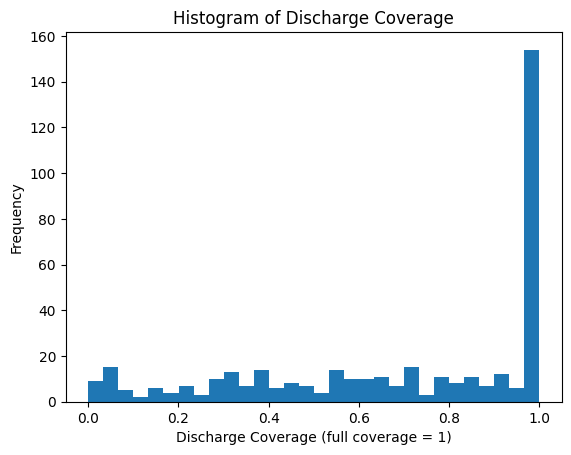

In [18]:
# Convert the dictionary to a dataframe
US_discharge_coverage_df: pd.DataFrame = pd.DataFrame.from_dict(basins_dict, orient='index', columns=['discharge_coverage'])

# Display summary statistics
print(US_discharge_coverage_df.describe())

# Plot the discharge coverage
plt.hist(US_discharge_coverage_df['discharge_coverage'], bins=30)
plt.xlabel('Discharge Coverage (full coverage = 1)')
plt.ylabel('Frequency')
plt.title('Histogram of Discharge Coverage')
plt.show()

### Other Columns

In [57]:
col_names = ["discharge", "dayl", "prcp", "srad", "swe", "tmax", "tmin", "vp"]

for col_name in col_names:
    
    basins_dict: dict = basin_id_to_key(US_file_names)
    
    for file_name in tqdm(US_file_names):
        data_coverage: float = get_data_coverage(US_folder_path + '/' + file_name, col_name)
        
        key_index = file_name[:-4]
        basins_dict[key_index] = data_coverage
        
    basins_df = pd.DataFrame.from_dict(basins_dict, orient='index', columns=[col_name + '_coverage'])
    
    print(f"Summary statistics for {col_name}")
    print(basins_df.describe(), "")

100%|██████████| 399/399 [00:06<00:00, 59.07it/s]


Summary statistics for discharge
       discharge_coverage
count          399.000000
mean             0.695736
std              0.322892
min              0.000187
25%              0.426090
50%              0.789726
75%              1.000000
max              1.000000 


100%|██████████| 399/399 [00:06<00:00, 64.19it/s]


Summary statistics for dayl
       dayl_coverage
count          399.0
mean             1.0
std              0.0
min              1.0
25%              1.0
50%              1.0
75%              1.0
max              1.0 


100%|██████████| 399/399 [00:06<00:00, 66.01it/s]


Summary statistics for prcp
       prcp_coverage
count          399.0
mean             1.0
std              0.0
min              1.0
25%              1.0
50%              1.0
75%              1.0
max              1.0 


100%|██████████| 399/399 [00:06<00:00, 66.50it/s]


Summary statistics for srad
       srad_coverage
count          399.0
mean             1.0
std              0.0
min              1.0
25%              1.0
50%              1.0
75%              1.0
max              1.0 


100%|██████████| 399/399 [00:06<00:00, 59.40it/s]


Summary statistics for swe
       swe_coverage
count         399.0
mean            1.0
std             0.0
min             1.0
25%             1.0
50%             1.0
75%             1.0
max             1.0 


100%|██████████| 399/399 [00:06<00:00, 60.17it/s]


Summary statistics for tmax
       tmax_coverage
count          399.0
mean             1.0
std              0.0
min              1.0
25%              1.0
50%              1.0
75%              1.0
max              1.0 


100%|██████████| 399/399 [00:06<00:00, 59.71it/s]


Summary statistics for tmin
       tmin_coverage
count          399.0
mean             1.0
std              0.0
min              1.0
25%              1.0
50%              1.0
75%              1.0
max              1.0 


100%|██████████| 399/399 [00:06<00:00, 63.84it/s]

Summary statistics for vp
       vp_coverage
count        399.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0 


## 2. Discharge Data Distribution

In [58]:
US_discharge_values: pd.Series = pd.Series()

for file_name in tqdm(US_file_names):
    temp_data: pd.Series = get_column_values(US_folder_path + '/' + file_name)
    
    US_discharge_values = pd.concat([US_discharge_values, temp_data])

  0%|          | 0/399 [00:00<?, ?it/s]C:\Users\ybrot\AppData\Local\Temp\ipykernel_21612\2163804657.py:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  US_discharge_values = pd.concat([US_discharge_values, temp_data])
100%|██████████| 399/399 [00:10<00:00, 37.82it/s]


In [59]:
discharge_summary_stats = US_discharge_values.describe()
discharge_summary_stats

count    4.458237e+06
mean     5.720082e+02
std      6.214572e+03
min     -9.999990e+05
25%      3.600000e+01
50%      1.450000e+02
75%      5.130000e+02
max      1.130000e+05
dtype: float64

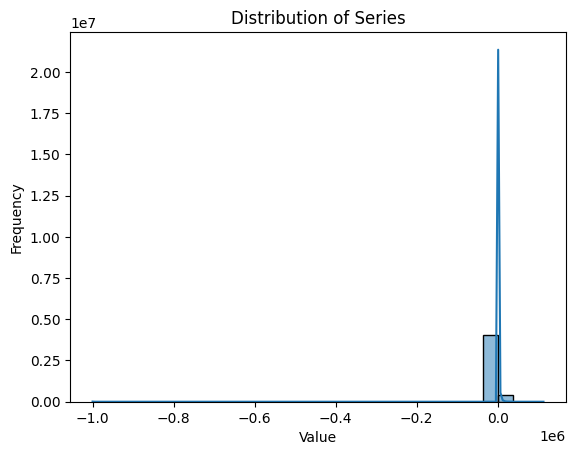

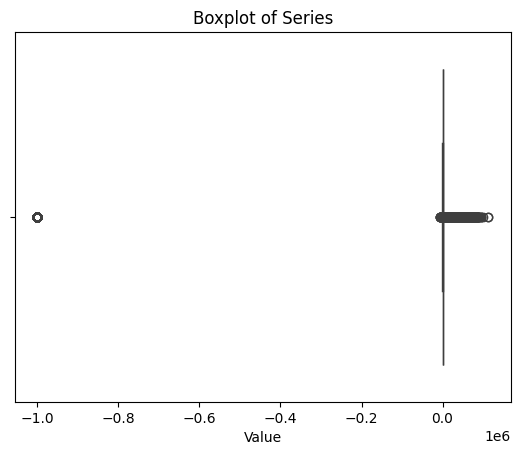

In [60]:
# Plot the discharge coverage
import seaborn as sns

# Histogram
sns.histplot(US_discharge_values, bins=30, kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Series')
plt.show()

# Boxplot
sns.boxplot(x=US_discharge_values)
plt.xlabel('Value')
plt.title('Boxplot of Series')
plt.show()

# Canada Basins

Repeat the same analysis for Canadian basins.

## 1. Discharge Data Coverage

In [9]:
from tqdm import tqdm

# Get the file names
Canadian_folder_path: str = "Canadian_climate_discharge_data"
Canadian_file_names: list = get_file_names(Canadian_folder_path)

# Get the basin id to key
basins_dict: dict = basin_id_to_key(Canadian_file_names)

# Get the discharge coverage
for file_name in tqdm(Canadian_file_names):
    discharge_coverage: float = get_data_coverage(Canadian_folder_path + '/' + file_name)
    
    key_index = file_name[:-4]
    basins_dict[key_index] = discharge_coverage


100%|██████████| 577/577 [00:09<00:00, 62.43it/s]


       discharge_coverage
count          577.000000
mean             0.797227
std              0.402414
min              0.000000
25%              1.000000
50%              1.000000
75%              1.000000
max              1.000000


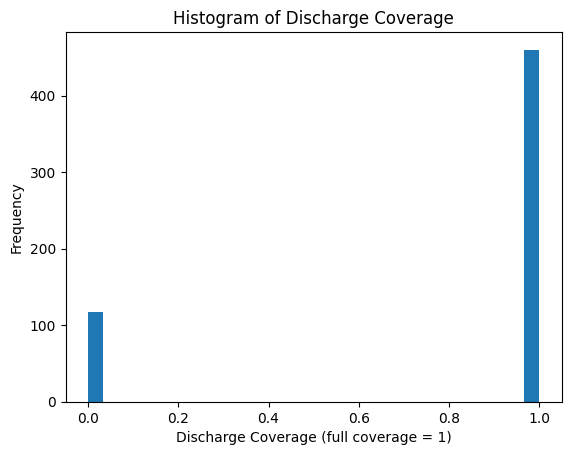

In [15]:
import matplotlib.pyplot as plt
# Convert the dictionary to a dataframe
Canadian_discharge_coverage_df: pd.DataFrame = pd.DataFrame.from_dict(basins_dict, orient='index', columns=['discharge_coverage'])

# Display summary statistics
print(Canadian_discharge_coverage_df.describe())

# Plot the discharge coverage
plt.hist(Canadian_discharge_coverage_df['discharge_coverage'], bins=30)
plt.xlabel('Discharge Coverage (full coverage = 1)')
plt.ylabel('Frequency')
plt.title('Histogram of Discharge Coverage')
plt.show()

In [11]:
col_names = ["discharge", "dayl", "prcp", "srad", "swe", "tmax", "tmin", "vp"]

for col_name in col_names:
    
    basins_dict: dict = basin_id_to_key(Canadian_file_names)
    
    for file_name in tqdm(Canadian_file_names):
        data_coverage: float = get_data_coverage(Canadian_folder_path + '/' + file_name, col_name)
        
        key_index = file_name[:-4]
        basins_dict[key_index] = data_coverage
        
    basins_df = pd.DataFrame.from_dict(basins_dict, orient='index', columns=[col_name + '_coverage'])
    
    print(f"Summary statistics for {col_name}")
    print(basins_df.describe(), "\n")

100%|██████████| 577/577 [00:09<00:00, 63.57it/s]


Summary statistics for discharge
       discharge_coverage
count          577.000000
mean             0.739702
std              0.394737
min              0.000000
25%              0.663325
50%              0.983935
75%              1.000000
max              1.000000 



100%|██████████| 577/577 [00:09<00:00, 61.45it/s]


Summary statistics for dayl
       dayl_coverage
count     577.000000
mean        0.797227
std         0.402414
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000 



100%|██████████| 577/577 [00:09<00:00, 61.60it/s]


Summary statistics for prcp
       prcp_coverage
count     577.000000
mean        0.797227
std         0.402414
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000 



100%|██████████| 577/577 [00:09<00:00, 61.60it/s]


Summary statistics for srad
       srad_coverage
count     577.000000
mean        0.797227
std         0.402414
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000 



100%|██████████| 577/577 [00:09<00:00, 60.67it/s]


Summary statistics for swe
       swe_coverage
count    577.000000
mean       0.797227
std        0.402414
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000 



100%|██████████| 577/577 [00:09<00:00, 59.93it/s]


Summary statistics for tmax
       tmax_coverage
count     577.000000
mean        0.797227
std         0.402414
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000 



100%|██████████| 577/577 [00:14<00:00, 38.85it/s]


Summary statistics for tmin
       tmin_coverage
count     577.000000
mean        0.797227
std         0.402414
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000 



100%|██████████| 577/577 [00:15<00:00, 37.74it/s]

Summary statistics for vp
       vp_coverage
count   577.000000
mean      0.797227
std       0.402414
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000 



## 2. Discharge Data Distribution

In [12]:
Canadian_discharge_values: pd.Series = pd.Series()

for file_name in tqdm(Canadian_file_names):
    temp_data: pd.Series = get_column_values(Canadian_folder_path + '/' + file_name)
    
    Canadian_discharge_values = pd.concat([Canadian_discharge_values, temp_data])

  0%|          | 0/577 [00:00<?, ?it/s]C:\Users\ybrot\AppData\Local\Temp\ipykernel_19436\3844740279.py:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  Canadian_discharge_values = pd.concat([Canadian_discharge_values, temp_data])
C:\Users\ybrot\AppData\Local\Temp\ipykernel_19436\3844740279.py:6: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  Canadian_discharge_values = pd.concat([Canadian_discharge_values, temp_data])
C:\Users\ybrot\AppData\Local\Temp\ipykernel_19436\3844740279.py:6: FutureWarning: The behavior of array concatenation with empty entries is

In [13]:
Canadian_discharge_summary_stats = Canadian_discharge_values.describe()
Canadian_discharge_summary_stats

count    4.473397e+06
mean     1.153141e+01
std      3.228405e+01
min     -8.000000e+00
25%      4.410000e-01
50%      1.660000e+00
75%      7.280000e+00
max      1.310000e+03
dtype: float64

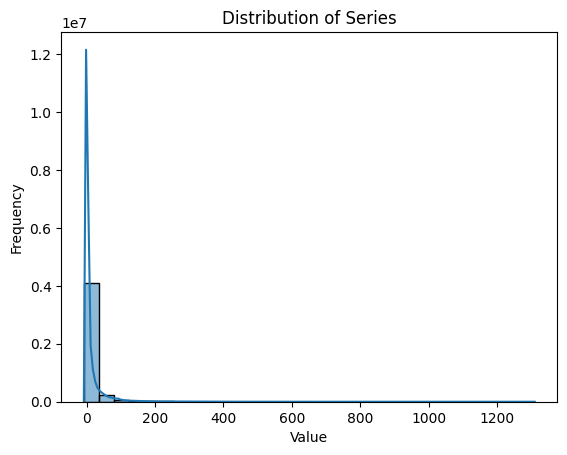

In [14]:
# Plot the discharge coverage
import seaborn as sns

sns.histplot(Canadian_discharge_values, bins=30, kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Series')
plt.show()